In [1824]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,learning_curve, RandomizedSearchCV
from sklearn.dummy import DummyRegressor

In [1825]:
df = pd.read_csv("dataset_clear.csv")

In [1826]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [1827]:
feature = df.columns[0:-1]
target = 'charges'
X =df.drop(["charges"],axis=1)
y = df[target]



In [1828]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True, random_state=42, train_size = 0.8)

In [1829]:
dummy = DummyRegressor()

In [1830]:
numerical_features = [
       'age','bmi'
       ]
categorical_features = [
       'sex' , 'smoker', 'region','children'
       ]



In [1831]:


my_col_trans = ColumnTransformer([
    ("sclal",StandardScaler(),numerical_features),
    ("one_hot_encoder",OneHotEncoder(handle_unknown='ignore'),categorical_features),
    
])



In [1832]:
X_train.head()

,age,sex,bmi,children,smoker,region
1113,23,male,24.510,0,no,northeast
967,21,male,25.745,2,no,northeast
598,52,female,37.525,2,no,northwest
170,63,male,41.470,0,no,southeast
275,47,female,26.600,2,no,northeast


In [1833]:
dummy.fit(X_train,y_train)
dummy.score(X_test,y_test)





-0.008391982350864469

In [1834]:
modelLasso= make_pipeline(my_col_trans,PolynomialFeatures(degree=2), Lasso(alpha=40.105,max_iter=100000))
modelLasso.fit(X_train,y_train)
modelLasso.score(X_train,y_train)


0.833650440668799

In [1835]:
modelLasso.score(X_test,y_test)

0.8864285731781776

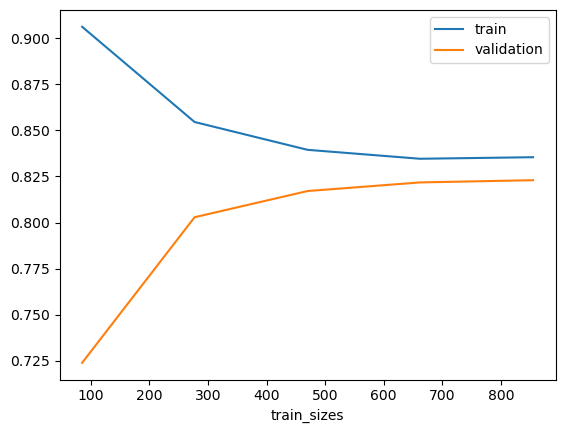

In [1836]:
train_sizes, train_scores, test_scores= learning_curve(modelLasso,X_train,y_train)
                                           
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

In [1837]:
y_pred = modelLasso.predict(X_train)

In [1838]:
residual = (y_pred - y_train).abs().sort_values()

In [1839]:
residual.describe()

count     1069.000000
mean      2924.446817
std       3773.145048
min         31.507464
25%       1149.377069
50%       1710.027427
75%       2497.856979
max      30402.197109
Name: charges, dtype: float64

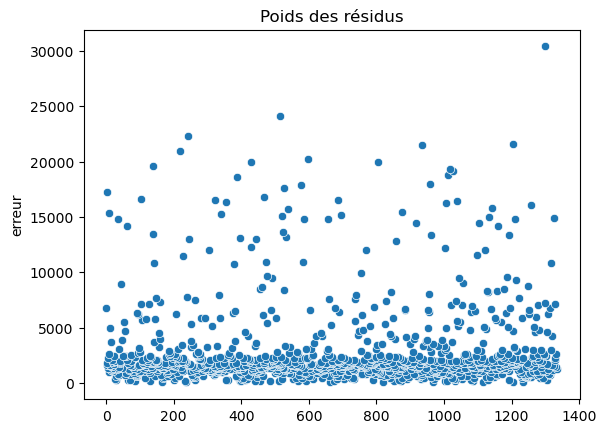

In [1840]:


sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()



In [1841]:
to_drop = residual[residual > 20000].index

In [1842]:


X_train = X_train.drop(to_drop)
y_train = y_train.drop(to_drop)



In [1843]:


modelLasso.fit(X_train,y_train)
modelLasso.score(X_train,y_train)



0.8591897026654682

In [1844]:


modelLasso.score(X_test,y_test)



0.887261335480116

In [1845]:
y_pred = modelLasso.predict(X_train)

In [1846]:
residual = (y_pred - y_train).abs().sort_values()

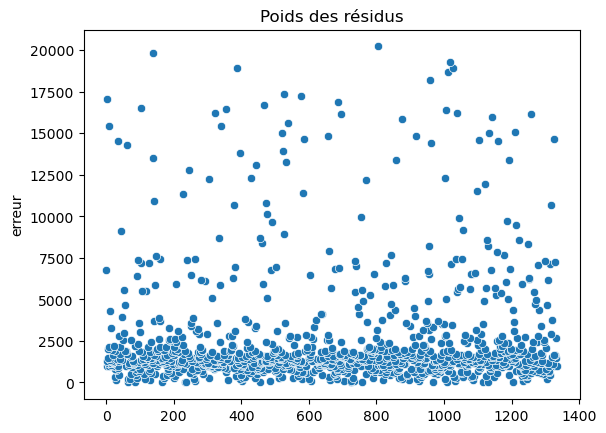

In [1847]:
sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [1848]:
residual.describe()

count     1061.000000
mean      2646.185690
std       3434.776879
min          0.609213
25%       1003.767151
50%       1474.109301
75%       2384.541507
max      20226.407464
Name: charges, dtype: float64

In [1849]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(modelLasso,X_train,y_train,cv=5,return_times=True)
                                           
                                           


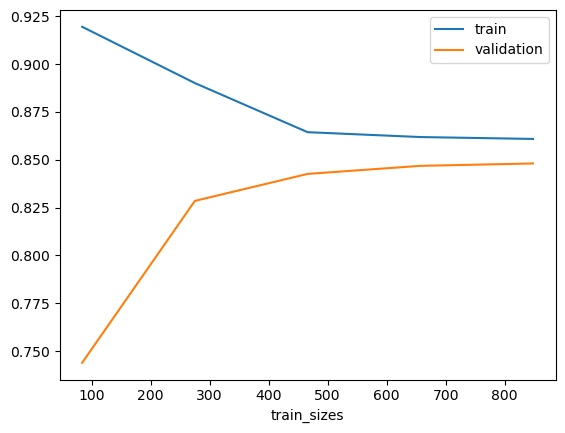

In [1850]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()